# Tokenization & Tokenizer

## Tokenization
- text를 word 또는 sub-word로 분리하는 것

### Tokenization 방법
1. rule-based tokenization(공백 또는 구둣점으로 분리)
- 문제점 : very big vocabulary 생성(ex. TransformerXL) => large embedding matrix 생성 => memory, time complexity 증가
2. Subword tokenization
- 원칙 : 빈번히 사용되는 단어는 더 작은 subword로 나뉘어 지면 안되고 가끔 사용되는 단어는 의미 있는 subword로 나뉘어 져야 한다
    - 교칙어(한국어, 터키어, 일본어 등)의 token화에 유용
    
## Tokenizer
- **사전 방식** - KoNLPy(언어 지식 필요)
- **sub-word 방식**(언어 지식 불필요, 다수의 언어에 공통으로 적용 가능)

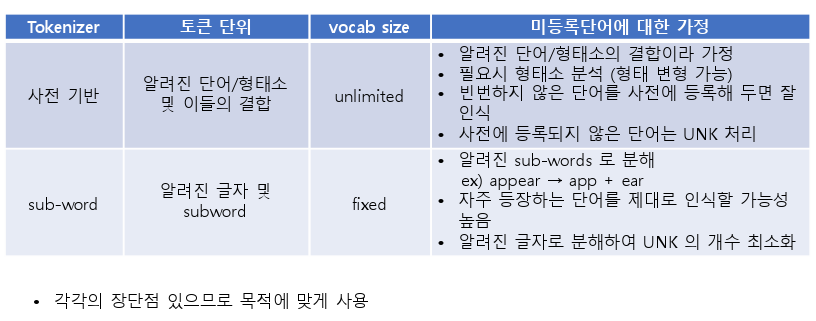

## WPM(Word Piece Model)
- 하나의 단어를 내부단어(subword)로 통계에 기반하여 띄어쓰기로 분리
- 2015년 처음 제안되어 Google 번역기에서 사용
- 하나의 단어는 의미 있는 여러 단어들의 조합으로 구성된 경우가 많기 때문에, 단어를 여러 단어로 분리하여 보겠다는 전처리 작업
- 입력 문장에서 띄어쓰기는 언더바( _ )
- 기존에 띄어쓰기를 언더바로 치환하는 이유는 차후 다시 문장 복원을 위한 장치
- WPM은 BPE(Byte Pair Encoding)알고리즘 사용
    - 1994년에 제안된 데이터 압축 알고리즘
    - 훈련 데이터에 있는 단어들을 모든 글자(characters)또는 유니코드(unicode) 단위로 단어 집합(vocabulary)를 만들고, 가장 많이 등장하는 유니그램을 하나의 유니그램으로 통합

## Google SentencePiece
- 사전 토큰화 작업 없이 단어 분리 토큰화를 수행하므로 **언어에 종속되지 않음**
- 영어권 언어나 한국어는 단어 분리를 시도했을 때 어느정도 의미있는 단위로 나누는 것이 가능
- Open Source로 개방하여 실무에 사용가능
- SentencePiece는 Unigram 알고리즘 사용

## Tokenizer Train

In [11]:
!pip install -q Konlpy
!pip install -U -q sentencepiece

In [2]:
sentences_E = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'I was born in Korea and graduaged University in USA.',
]
sentences_K = [
    "코로나가 심하다",
    "코비드-19가 심하다",
    '아버지가방에들어가신다',
    '아버지가 방에 들어가신다',
    '너무너무너무는 나카무라세이코가 불러 크게 히트한 노래입니다'
]

### Keras 기본 Tokenizer - rule-based
- 공백 또는 구둣점으로 분리
- 영어 단어별로 띄어쓰기가 철처히 지켜지는 언어

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=100, oov_token='<OOV>') # 빈도수 상위 100개
tokenizer.fit_on_texts(sentences_E)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'i': 2, 'love': 3, 'my': 4, 'dog': 5, 'in': 6, 'cat': 7, 'you': 8, 'was': 9, 'born': 10, 'korea': 11, 'and': 12, 'graduaged': 13, 'university': 14, 'usa': 15}


Keras의 rule base tokenizer로 한글을 tokenize

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=100, oov_token='<OOV>') # 빈도수 상위 100개
tokenizer.fit_on_texts(sentences_K)
vocabulary_keras_korean = tokenizer.word_index
print(vocabulary_keras_korean)

{'<OOV>': 1, '심하다': 2, '코로나가': 3, '코비드': 4, '19가': 5, '아버지가방에들어가신다': 6, '아버지가': 7, '방에': 8, '들어가신다': 9, '너무너무너무는': 10, '나카무라세이코가': 11, '불러': 12, '크게': 13, '히트한': 14, '노래입니다': 15}


In [ ]:
tokenizer = Tokenizer(num_words=100, oov_token='<OOV>') # 빈도수 상위 100개
tokenizer.fit_on_texts(sentences_K)
word_index = tokenizer.word_index
print(word_index)

### 단어 사전 기반 한국어 tokenizer 사용

In [13]:
from konlpy.tag import Okt
okt = Okt()

temp_X =[]
for sent in sentences_K:
    temp_X.append(okt.morphs(sent))
    print(okt.morphs(sent))

['코로나', '가', '심하다']
['코', '비드', '-', '19', '가', '심하다']
['아버지', '가방', '에', '들어가신다']
['아버지', '가', '방', '에', '들어가신다']
['너무', '너무', '너', '무', '는', '나카무라', '세이', '코', '가', '불러', '크게', '히트', '한', '노래', '입니다']


사전 기반 tokenize후 Keras tokenizer로 vocbulary 생성

In [18]:
tokenizer = Tokenizer(num_words=100,oov_token='<OOV>')
tokenizer.fit_on_texts(temp_X)
vocabulary_okt_keras = tokenizer.word_index
print(vocabulary_okt_keras)

{'<OOV>': 1, '가': 2, '심하다': 3, '코': 4, '아버지': 5, '에': 6, '들어가신다': 7, '너무': 8, '코로나': 9, '비드': 10, '-': 11, '19': 12, '가방': 13, '방': 14, '너': 15, '무': 16, '는': 17, '나카무라': 18, '세이': 19, '불러': 20, '크게': 21, '히트': 22, '한': 23, '노래': 24, '입니다': 25}


In [23]:
print(vocabulary_keras_korean)
print('================================================================')
print(vocabulary_okt_keras)

{'<OOV>': 1, '심하다': 2, '코로나가': 3, '코비드': 4, '19가': 5, '아버지가방에들어가신다': 6, '아버지가': 7, '방에': 8, '들어가신다': 9, '너무너무너무는': 10, '나카무라세이코가': 11, '불러': 12, '크게': 13, '히트한': 14, '노래입니다': 15}
{'<OOV>': 1, '가': 2, '심하다': 3, '코': 4, '아버지': 5, '에': 6, '들어가신다': 7, '너무': 8, '코로나': 9, '비드': 10, '-': 11, '19': 12, '가방': 13, '방': 14, '너': 15, '무': 16, '는': 17, '나카무라': 18, '세이': 19, '불러': 20, '크게': 21, '히트': 22, '한': 23, '노래': 24, '입니다': 25}


단, Okt사전에 미등록된 단어의 경우 정확한 tokenizing이 안됨

In [20]:
okt.pos('너무너무너무는 나카무라세이코가 불러 크게 히트한 노래입니다')
# 사전에 단어를 추가해야 정확하게 분석한다
# 나카무라세이코 : 고유명사

[('너무', 'Adverb'),
 ('너무', 'Adverb'),
 ('너', 'Modifier'),
 ('무', 'Noun'),
 ('는', 'Josa'),
 ('나카무라', 'Noun'),
 ('세이', 'Noun'),
 ('코', 'Noun'),
 ('가', 'Josa'),
 ('불러', 'Verb'),
 ('크게', 'Noun'),
 ('히트', 'Noun'),
 ('한', 'Josa'),
 ('노래', 'Noun'),
 ('입니다', 'Adjective')]

### Google SentencePiece Tokenizer
- NSMC(Naver Sentiment Movie Corpus) data를 이용한 tokenizer train
- Naver Movie rating data를 이용한 sentencepiece tokenizer training

In [24]:
import tensorflow as tf
import pandas as pd
import sentencepiece as spm
DATA_TRAIN_PATH = './naver_movie/ratings_train.txt'

pandas.read_csv에서 quoting=3으로 설정해주면 인용구(따옴표)무시

In [25]:
train_data = pd.read_csv(DATA_TRAIN_PATH,sep='\t',quoting=3)

print(train_data.shape)
train_data.head()

(150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [26]:
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [28]:
train_data.dropna(inplace=True)
train_data.shape

(149995, 3)

#### 학습을 위해 text 따로 저장

In [29]:
with open('./nsmc.txt','w',encoding='utf-8') as f:
    for line in train_data.document.values:
        try:
            f.write(line+'\n')
        except:
            print("write error -->",line)

In [30]:
with open ('./nsmc.txt','r',encoding='utf-8') as f:
    nsmc_txt = f.read().split('\n')

print(len(nsmc_txt))
print(nsmc_txt[0])

149996
아 더빙.. 진짜 짜증나네요 목소리


In [36]:
input_file = 'nsmc.txt'
vocab_size = 30000
prefix = 'nsmc'
templates = '--input={} --model_prefix={} --vocab_size={}'
cmd = templates.format(input_file,prefix,vocab_size)
cmd

'--input=nsmc.txt --model_prefix=nsmc --vocab_size=30000'

### sentencepiece tokenizer training

In [41]:
spm.SentencePieceTrainer.Train(cmd)

In [43]:
sp = spm.SentencePieceProcessor()
sp.Load('{}.model'.format(prefix))

True

In [44]:
for t in train_data.document.values[:3]:
    print(t)
    print(sp.encode_as_pieces(t)) #띄어쓰기 부분 _로
    print(sp.encode_as_ids(t),'\n')

아 더빙.. 진짜 짜증나네요 목소리
['▁아', '▁더빙', '..', '▁진짜', '▁짜증나네요', '▁목소리']
[53, 751, 5, 25, 15853, 1405] 

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
['▁흠', '...', '포스터보고', '▁초딩영화', '줄', '....', '오버', '연기', '조차', '▁가볍지', '▁않', '구나']
[1239, 6, 12536, 18315, 396, 47, 17886, 395, 1134, 6404, 1063, 423] 

너무재밓었다그래서보는것을추천한다
['▁너무', '재', '밓', '었다', '그래서', '보는것', '을', '추천', '한다']
[18, 611, 21195, 640, 2752, 11171, 14, 2315, 298] 

